<a href="https://colab.research.google.com/github/bisheralwan/ChatBot/blob/main/W2025/Assignments/Assignment2/Ass2_SYSC4415_W25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYSC4415 Assignment 2 – Fire Hydrant Detection 🚒

"""
Special thanks to Nader Ibrahim for assembling the dataset. For more details, please refer to the paper:

Ibrahim N, Dick K, Green JR. Computer Vision Fire Hydrant Obstruction Detection System. In2024 IEEE Canadian Conference on Electrical and Computer Engineering (CCECE) 2024 Aug 6 (pp. 799-805). IEEE.


Questions? Please use the Brightspace Discussion Board.

Deadline: See Brightspace end date.
"""

## Instructions
DO NOT wait until the last minute to complete this assignment as training the models might take longer. Also leverage the free GPU provided by colab to make your training faster.


Follow all steps carefully. Your solutions must be self-contained in this notebook. No other supplementary materials or files will be accepted. As soon as I open your notebook, I will click "Runtime" → "Run all". Ensure your notebook runs without errors and displays results clearly.


You are asked to provide both code and text to address discussion questions. For the text answers, see the markdown cells with the ❓ emoji for questions and enter your answers following the ✅ emoji.

Provide sufficient comments in your code to describe its functionality. Do not remove any necessary libraries as this will cause errors.

Download the dataset from Brightspace and store it in your Google Drive under "My Drive" (not in any subfolder). Check the file location via right-click → File Information → Details → Location.

Submit your notebook as a `.ipynb` file named: `SYSC4415W25_A2_FIRSTNAME_LASTNAME_StudentID.ipynb` on Brightspace. No other submission methods will be accepted.


## Dataset
Provided on Brightspace.

#### Dataset details:
- Training Images: 2,272  
- Validation Images: 563  
- Labels: 0 = No Fire Hydrant, 1 = Fire Hydrant  
- Imbalanced dataset (most images do not contain a hydrant).

#### Dataset Information
The dataset contains two main folders:
- `train/`: Contains the training images and a CSV file with labels.
- `valid/`: Contains the validation images and a CSV file with labels.

Each folder includes:
- Images of fire hydrants and non-fire hydrants.
- A CSV file (`_classes.csv`) mapping each image filename to its label:
  - `0` for no fire hydrant.
  - `1` for fire hydrant.

Ensure the zip file of the dataset (FH_detection_data.zip) to your Google Drive and placed under "My Drive" without any subfolders to keep the paths consistent.


# **Bisher Abou-Alwan - 101211242**


## Steps

### 1) Initial Setup
Import necessary libraries


In [1]:
# Import all the necessary libraries here

import pandas as pd
import os

Mount Google Drive and unzip the dataset.

In [2]:
## Code provided by Akash. DO NOT CHANGE THIS CELL

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Unzip the dataset
!unzip /content/drive/MyDrive/FH_detection_data.zip -d /content/


# Dataset path
train_data_path = "/content/train"
valid_data_path = "/content/valid"
train_label = pd.read_csv('/content/train/_classes.csv')
valid_label = pd.read_csv('/content/valid/_classes.csv')

Mounted at /content/drive
Archive:  /content/drive/MyDrive/FH_detection_data.zip
   creating: /content/train/
 extracting: /content/train/10063782964_891eedde4e_z_jpg.rf.4caba9d0e35546b469aa896df780d833.jpg  
 extracting: /content/train/100_PNG.rf.d52fbff94c483761d0644a1e8abe4c95.jpg  
 extracting: /content/train/101_PNG.rf.f1335e18f815c8c8044a94c09db7f025.jpg  
 extracting: /content/train/102378468_d8132a415b_z_jpg.rf.6bc008d0d532d3365f580b7aaa7623e3.jpg  
 extracting: /content/train/102_PNG.rf.160c945e0881c92a078a14069d9a6b9a.jpg  
 extracting: /content/train/102_jpg.rf.17df75e9dda0f851c9f5e1d554f07488.jpg  
 extracting: /content/train/103357395_388d701e12_z_jpg.rf.a54c985e93402af49ba422f005e702d8.jpg  
 extracting: /content/train/103_jpg.rf.a649213f3998906bf2298607f82ee839.jpg  
 extracting: /content/train/104351403_25e959f878_z_jpg.rf.43156bd0a74313df69967d88e5e6a268.jpg  
 extracting: /content/train/104_PNG.rf.c14671a6a52ae05f9ae2bf1df7e4316e.jpg  
 extracting: /content/train/104_

----

### 2) Data Exploration
1. Load dataset into a pandas DataFrame.
2. Display display three sample images from each class
3. Create separately class distribution plots of the train and validation data
[Requires 6 sample images (three from each class) and two plots of class distribution (train and validation)]

❓ Why is it important to check for class imbalance before training? How might this affect our model?  
✅ We must check because class imbalance can really impact model performance because if one class dominates, the model may be biased towards predicting it, reducing accuracy for any of the minority classes.


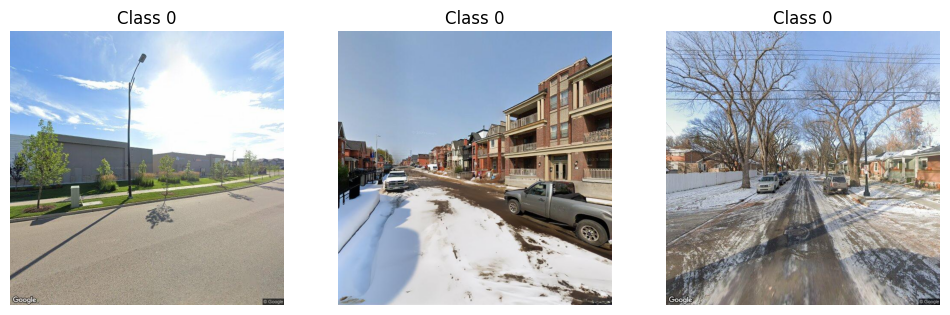

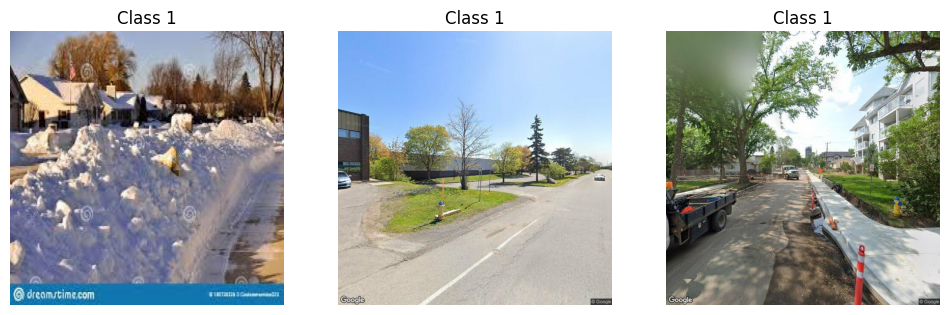

<ipython-input-3-73542bcf6fa2>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["No Fire Hydrant", "Fire Hydrant"])
<ipython-input-3-73542bcf6fa2>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["No Fire Hydrant", "Fire Hydrant"])


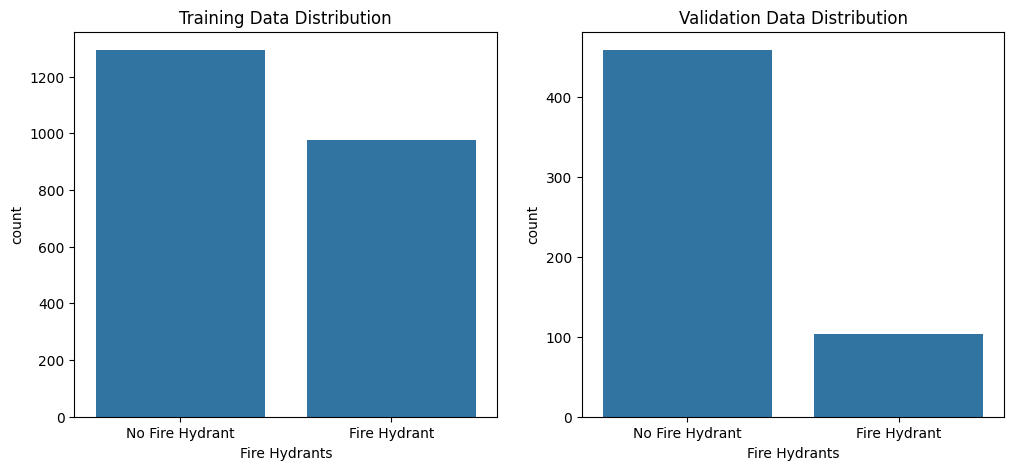

In [3]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import random
import seaborn as sns

#make a function to display images from each class
def display_images(class_label, dataset_path, label_df, num_images=3):
    #filter images belonging to classes
    class_images = label_df[label_df['Fire Hydrants'] == class_label]['filename'].tolist()
    sample_images = random.sample(class_images, num_images) #grab random images

    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))
    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(dataset_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Class {class_label}")
    plt.show()

#display the 3 images of each class now
display_images(0, train_data_path, train_label)
display_images(1, train_data_path, train_label)

#now we must plot class distribution for training and validation sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#training data distribution
sns.countplot(x=train_label['Fire Hydrants'], ax=axes[0])
axes[0].set_title("Training Data Distribution")
axes[0].set_xticklabels(["No Fire Hydrant", "Fire Hydrant"])

#validation data distribution
sns.countplot(x=valid_label['Fire Hydrants'], ax=axes[1])
axes[1].set_title("Validation Data Distribution")
axes[1].set_xticklabels(["No Fire Hydrant", "Fire Hydrant"])

plt.show()


---

### 3) Preprocessing
- Resize images to 128x128.
- Apply any other necessary transformations that you feel can help.

❓ Would one-hot encoding be necessary for binary classification? Why or why not?  
✅ No because one-hot encoding is not necessary for binary classification since we already only have two classes which is 0 and 1. One-hot encoding should be used for multi-class classification where we need to represent multiple classes using separate binary columns, not binary classifications.

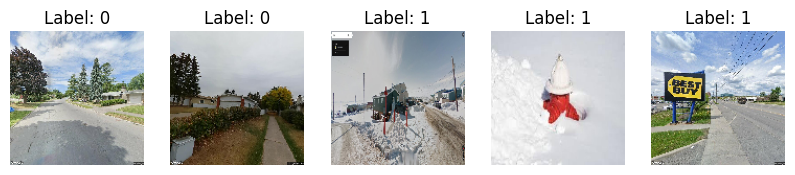

In [4]:
import cv2
import os
import numpy as np

#make function to resize and transform images
def preprocess_images(data_path, label_df, target_size=(128, 128)):
    images = [] #empty list for images to populate
    labels = [] #list for labels to populate
    for index, row in label_df.iterrows():
        img_path = os.path.join(data_path, row['filename'])
        img = cv2.imread(img_path)

        img = cv2.resize(img, target_size) #resize to 128x128px
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #RGB transformation

        images.append(img) #append to images list to populate
        labels.append(row['Fire Hydrants']) #append to labels list to populate

    return np.array(images), np.array(labels)

#lets preprocess train and validation iages
train_images, train_labels = preprocess_images(train_data_path, train_label)
valid_images, valid_labels = preprocess_images(valid_data_path, valid_label)

#lets see how they look
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


---

### 4) Creating the Baseline Model
Create a CNN with:
- Two convolutional layers to extract features from the images.
- Max pooling layers after each convolution to reduce spatial dimensions.
- Fully connected layers to perform classification.
- A sigmoid activation function at the output layer to output a probability between 0 and 1.

Required architecture:
- Input: RGB images resized to 128x128 pixels.
- Conv2d (3 input channels, 32 output channels, kernel size 3, padding 1)
- MaxPool2d (kernel size 2, stride 2, padding 0) – applied after the first Conv2d.
- Conv2d (32 input channels, 64 output channels, kernel size 3, padding 1)
- MaxPool2d (kernel size 2, stride 2, padding 0) – applied after the second Conv2d.
- Flatten
- Linear layer with 128 units
- Output Linear layer with 1 unit and sigmoid activation



This model will be trained to classify whether an image contains a fire hydrant or not.


❓ List three ways to improve the baseline model (e.g., adding dropout to... , using batch normalization to..., or increasing the number of layers to...,
be sure to come up with your own ideas!). Provide a brief explanation for each.

✅  1. Adding dropout layers after our fully connected layers, this will help prevent overfitting since we now randomly drop out neurons during the training. In result of this, the network learns more robust features and reduces reliance on individual neurons.

2. Applying batch normalization after the convolutional layers would help us in stabilizing the training by normalizing the activations within each batch. Because of this we can actually have faster convergence and better performance.

3. Using data augmentation techniques like random cropping, flipping, and rotations can really help us increase the size and diversity of the training data, which can give us a more robust and generalized model.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


class FireHydrantCNN(nn.Module):
    def __init__(self):
        super(FireHydrantCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#now we can finally initialize model
model = FireHydrantCNN()
print(model)


FireHydrantCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=65536, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


---

### 5) Training and Evaluation
Train your CNN using Binary Cross Entropy Loss and an Adam optimizer. Use a learning rate of 0.001. Iterate over your dataset for 10 epochs and track the loss. Train using the train data in /train.

Evaluate your model on the test data in /valid using Precision, Recall, and F1-Score to assess performance.


❓ Which evaluation metric you think is the most suitable in our case, and why?

✅
I think recall is the most suitable evaluation metric in this case because missing a fire hydrant detection could have serious consequences for us. A low recall means the model is not able to prpoerly identify actual fire hydrants, which could be problematic in real-world applications like city insfrastructure safety.


Display the confusion matrix.

❓ Explain the confusion matrix to a non-technical audience and relate it to your chosen metric.  
✅
A confusion matrix is essentially stats put on a table to help us understand how well our model is making predictions. It contains the numbers of True Positives with represents the number of actual fire hydrants correctly detected. Also it contains the number of True Negatives which is the number of images correctly identified as not having a fire hydrant. Next, it has the False Positives beign the number of images classified as fire hydrants when they were not, thus we were false in indicating that this was a fire hydrant.Then we have also False Negatives which is the number of actual fire hydrants the model failed to detect.

Epoch [1/10], Loss: 24.3494
Epoch [2/10], Loss: 0.5494
Epoch [3/10], Loss: 0.5095
Epoch [4/10], Loss: 0.4229
Epoch [5/10], Loss: 0.3550
Epoch [6/10], Loss: 0.2617
Epoch [7/10], Loss: 0.2056
Epoch [8/10], Loss: 0.1848
Epoch [9/10], Loss: 0.1514
Epoch [10/10], Loss: 0.1288


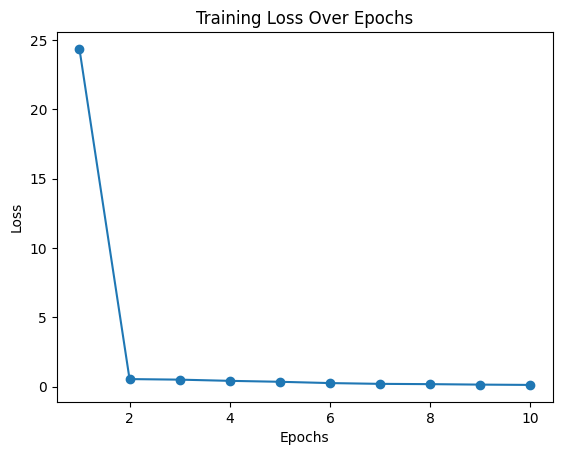

Precision: 0.3366
Recall: 0.6635
F1-Score: 0.4466


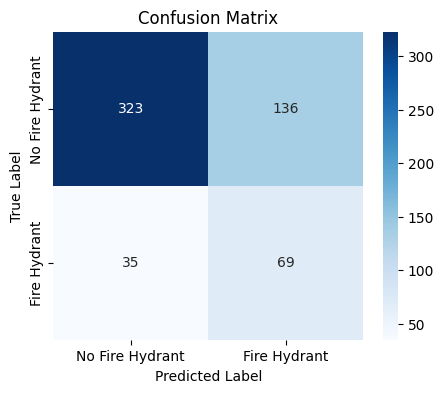

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

#lets first make a dataset class to convert images into PyTorch format
class FireHydrantDataset(Dataset):
    def __init__(self, images, labels):
        self.images = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2)
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

#ensure to train model using GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#now we make DataLoaders
train_dataset = FireHydrantDataset(train_images, train_labels)
valid_dataset = FireHydrantDataset(valid_images, valid_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

#lets define training parameters
num_epochs = 10
learning_rate = 0.001

#now we compute class weights to address class imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.array([0, 1]), y=train_labels)  # 🔧 FIXED
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  # Apply weight to the minority class
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#training loop
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)  # Ensure labels are float32

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

#lets plot training loss over epochs
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.show()

#now we can evaluate on the validation set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.cpu().numpy()
        outputs = model(images)
        preds = (torch.sigmoid(outputs).cpu().numpy() > 0.5).astype(int)  # Convert logits to probabilities, then to binary labels
        all_preds.extend(preds)
        all_labels.extend(labels)

#q convert to NumPy arrays
all_preds = np.array(all_preds).flatten()
all_labels = np.array(all_labels).flatten()

#calculate precision recall and F1
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire Hydrant", "Fire Hydrant"], yticklabels=["No Fire Hydrant", "Fire Hydrant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


---


### 6) Model Improvements
Apply and evaluate three improvements ideas that you mentioned in the Baseline CNN question (Step 4).
Implement each idea separately, train a model with that improvement, and report the performance of each model using the metrics from Step 5. As above, train using the data in /train and test using the data in /valid.


❓ Which model would you deploy? Why?  
✅ I would deply Batch Normalization since it had the highest recall at 63.5%, compared to dropout with recall of 53.8% and data augmentation of 54.8%. I choose the model with highest recall since recall is the most important metric for this model since a low recall means the model is not able to prpoerly identify actual fire hydrants, which could be problematic in real-world applications like city insfrastructure safety.

# **Adding Dropout...**

FireHydrantCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=65536, out_features=128, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
)
Epoch [1/10], Loss: 11.8527
Epoch [2/10], Loss: 0.6689
Epoch [3/10], Loss: 0.6774
Epoch [4/10], Loss: 0.6571
Epoch [5/10], Loss: 0.6707
Epoch [6/10], Loss: 0.7865
Epoch [7/10], Loss: 0.6635
Epoch [8/10], Loss: 0.6581
Epoch [9/10], Loss: 0.6392
Epoch [10/10], Loss: 0.6391


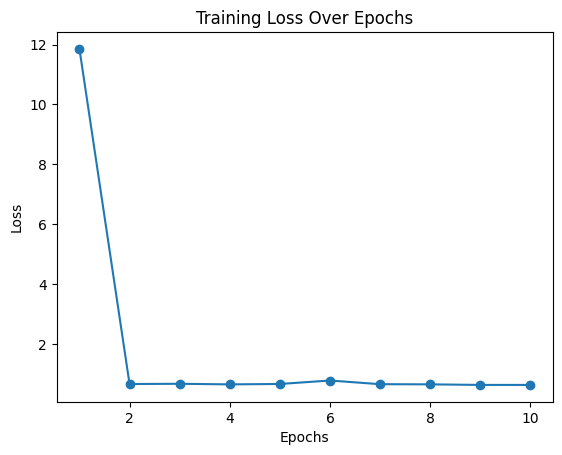

Precision: 0.8070
Recall: 0.4423
F1-Score: 0.5714


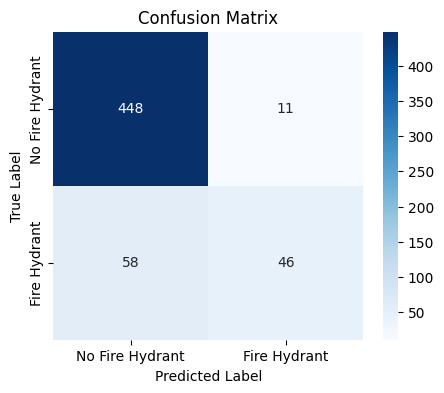

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class FireHydrantCNN(nn.Module):
    def __init__(self):
        super(FireHydrantCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 1)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        #now lets apply dropout to the output of fc2
        x = self.dropout2(x)
        return x

#now we can finally initialize model
model = FireHydrantCNN()
print(model)



from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

#lets first make a dataset class to convert images into PyTorch format
class FireHydrantDataset(Dataset):
    def __init__(self, images, labels):
        self.images = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2)
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

#ensure to train model using GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#now we make DataLoaders
train_dataset = FireHydrantDataset(train_images, train_labels)
valid_dataset = FireHydrantDataset(valid_images, valid_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

#lets define training parameters
num_epochs = 10
learning_rate = 0.001

#now we compute class weights to address class imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.array([0, 1]), y=train_labels)  # 🔧 FIXED
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  # Apply weight to the minority class
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#training loop
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)  # Ensure labels are float32

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

#lets plot training loss over epochs
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.show()

#now we can evaluate on the validation set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.cpu().numpy()
        outputs = model(images)
        preds = (torch.sigmoid(outputs).cpu().numpy() > 0.5).astype(int)  # Convert logits to probabilities, then to binary labels
        all_preds.extend(preds)
        all_labels.extend(labels)

#q convert to NumPy arrays
all_preds = np.array(all_preds).flatten()
all_labels = np.array(all_labels).flatten()

#calculate precision recall and F1
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire Hydrant", "Fire Hydrant"], yticklabels=["No Fire Hydrant", "Fire Hydrant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# **Data Augmentation**

Epoch [1/10], Loss: 0.2879
Epoch [2/10], Loss: 0.2203
Epoch [3/10], Loss: 0.1601
Epoch [4/10], Loss: 0.1902
Epoch [5/10], Loss: 0.1327
Epoch [6/10], Loss: 0.0798
Epoch [7/10], Loss: 0.0705
Epoch [8/10], Loss: 0.0717
Epoch [9/10], Loss: 0.0621
Epoch [10/10], Loss: 0.0432


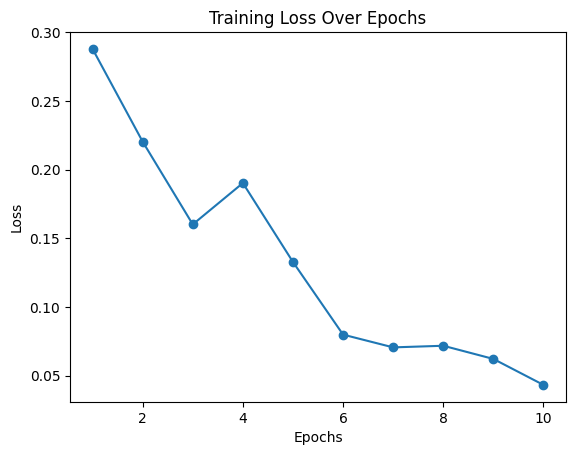

Precision: 0.3838
Recall: 0.6827
F1-Score: 0.4913


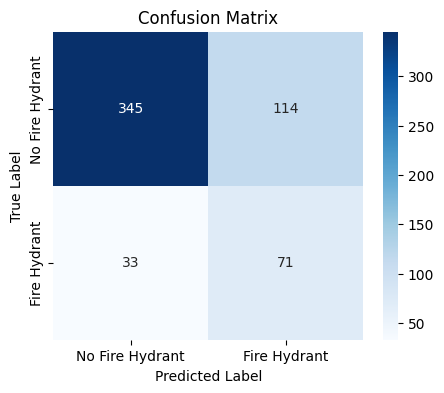

In [19]:
from torchvision import transforms

#create my transforms object with my transformations
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(), #flip it horizontally
    transforms.RandomRotation(10),  #rotate by up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), #adjust image settings
    transforms.ToTensor(),
])

class FireHydrantDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        #now we can apply transformations
        if self.transform:
            image = self.transform(image)

        #convert to tensor here if not already
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)

        return image, label


#lets first make a dataset class to convert images into PyTorch format
class FireHydrantDataset(Dataset):
    def __init__(self, images, labels):
        self.images = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2)
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]


#ensure to train model using GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#now we make DataLoaders
train_dataset = FireHydrantDataset(train_images, train_labels)
valid_dataset = FireHydrantDataset(valid_images, valid_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

#lets define training parameters
num_epochs = 10
learning_rate = 0.001

#now we compute class weights to address class imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.array([0, 1]), y=train_labels)  # 🔧 FIXED
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  # Apply weight to the minority class
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


#training loop
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)  # Ensure labels are float32

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

#lets plot training loss over epochs
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.show()

#now we can evaluate on the validation set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.cpu().numpy()
        outputs = model(images)
        preds = (torch.sigmoid(outputs).cpu().numpy() > 0.5).astype(int)  # Convert logits to probabilities, then to binary labels
        all_preds.extend(preds)
        all_labels.extend(labels)

#q convert to NumPy arrays
all_preds = np.array(all_preds).flatten()
all_labels = np.array(all_labels).flatten()

#calculate precision recall and F1
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire Hydrant", "Fire Hydrant"], yticklabels=["No Fire Hydrant", "Fire Hydrant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **Batch Normalization**

Epoch [1/10], Loss: 0.1190
Epoch [2/10], Loss: 0.0196
Epoch [3/10], Loss: 0.0199
Epoch [4/10], Loss: 0.0262
Epoch [5/10], Loss: 0.0588
Epoch [6/10], Loss: 0.0270
Epoch [7/10], Loss: 0.0647
Epoch [8/10], Loss: 0.0762
Epoch [9/10], Loss: 0.0801
Epoch [10/10], Loss: 0.0372


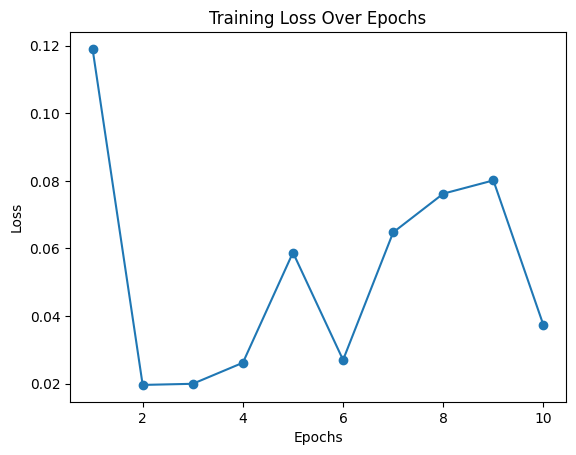

Precision: 0.4722
Recall: 0.6538
F1-Score: 0.5484


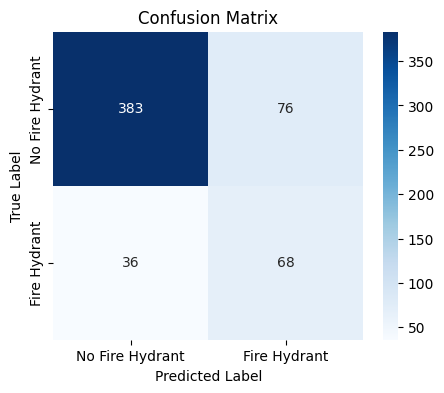

Model saved to /content/drive/MyDrive/FireHydrant/trained_model.pth


In [20]:
class FireHydrantCNN(nn.Module):
    def __init__(self):
      super(FireHydrantCNN, self).__init__()
      self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
      self.bn1 = nn.BatchNorm2d(32)  # atch normalization after conv1
      self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
      self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
      self.bn2 = nn.BatchNorm2d(64)  #Batch normalization after conv2
      self.fc1 = nn.Linear(64 * 32 * 32, 128)
      self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
      #now we apply Batch normalization
      x = self.pool(F.relu(self.bn1(self.conv1(x))))
      x = self.pool(F.relu(self.bn2(self.conv2(x))))
      x = x.view(x.size(0), -1)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x



#lets first make a dataset class to convert images into PyTorch format
class FireHydrantDataset(Dataset):
    def __init__(self, images, labels):
        self.images = torch.tensor(images, dtype=torch.float32).permute(0, 3, 1, 2)
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]


#ensure to train model using GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#now we make DataLoaders
train_dataset = FireHydrantDataset(train_images, train_labels)
valid_dataset = FireHydrantDataset(valid_images, valid_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

#lets define training parameters
num_epochs = 10
learning_rate = 0.001

#now we compute class weights to address class imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.array([0, 1]), y=train_labels)  # 🔧 FIXED
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  # Apply weight to the minority class
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#training loop
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)  # Ensure labels are float32

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

#lets plot training loss over epochs
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.show()

#now we can evaluate on the validation set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.cpu().numpy()
        outputs = model(images)
        preds = (torch.sigmoid(outputs).cpu().numpy() > 0.5).astype(int)  # Convert logits to probabilities, then to binary labels
        all_preds.extend(preds)
        all_labels.extend(labels)

#q convert to NumPy arrays
all_preds = np.array(all_preds).flatten()
all_labels = np.array(all_labels).flatten()

#calculate precision recall and F1
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fire Hydrant", "Fire Hydrant"], yticklabels=["No Fire Hydrant", "Fire Hydrant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#now since this is the best performer lets save it
model_save_path = "/content/drive/MyDrive/FireHydrant/trained_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


---

### 7) Personal Inference Test
Test your trained model on at least FIVE new images (either collected using a camera or collected from the internet). Predict whether each image contains a fire hydrant and print the result.

Of your five images:
- Include at least one image of a fire hydrant that your model does not detect correctly.
- Include at least one image of a fire hydrant that your model does detect correctly.

❓ Challenge: Can you find an image that does not actually contain a fire hydrant, but your model believes that a hydrant is present?

✅ Your answer here

❓ Explain why you believe your model performed the way it did on each of your five images. What patterns or mistakes do you observe?

✅ Your answer here


In [24]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import cv2
import numpy as np
from PIL import Image  # Import PIL for conversion
import os
from google.colab import drive

# 1️⃣ Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# 2️⃣ Define Model Architecture (Same as Training)
class FireHydrantCNN(nn.Module):
    def __init__(self):
        super(FireHydrantCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch normalization after conv1
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch normalization after conv2
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 3️⃣ Load the Trained Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "/content/drive/MyDrive/FireHydrant/trained_model.pth"
model = FireHydrantCNN().to(device)

try:
    model.load_state_dict(torch.load(model_path, map_location=device))
    print("Model loaded successfully!")
except RuntimeError as e:
    print(f"Error loading model: {e}")
    model.load_state_dict(torch.load(model_path, map_location=device), strict=False)
    print("Model loaded with missing keys ignored.")

model.eval()  # Set model to evaluation mode

# 4️⃣ Define Image Preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize image to match model input
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to match training data
])

def preprocess_image(image_path):
    # Read image using OpenCV
    img = cv2.imread(image_path)  # OpenCV loads image as BGR NumPy array
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format

    # Convert NumPy array (OpenCV) to PIL Image
    img = Image.fromarray(img)  # ✅ FIX: Convert to PIL format

    # Apply transformations
    img = transform(img)  # Now it works with torchvision.transforms
    img = img.unsqueeze(0)  # Add batch dimension
    return img.to(device)


# 5️⃣ Predict on New Images
image_folder = "/content/drive/MyDrive/FireHydrant"  # Path to images in Google Drive
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    img_tensor = preprocess_image(img_path)

    # Make prediction
    with torch.no_grad():
        output = model(img_tensor)
        prediction = torch.sigmoid(output).item()  # Convert logits to probability

    # Convert probability to class label
    label = "Fire Hydrant" if prediction > 0.5 else "No Fire Hydrant"

    # Print prediction result
    print(f"Image: {img_name} --> Prediction: {label} (Confidence: {prediction:.4f})")


Mounted at /content/drive
Model loaded successfully!
Image: download.jpeg --> Prediction: Fire Hydrant (Confidence: 1.0000)
Image: download (1).jpeg --> Prediction: Fire Hydrant (Confidence: 1.0000)
Image: download (2).jpeg --> Prediction: Fire Hydrant (Confidence: 1.0000)
Image: download (3).jpeg --> Prediction: Fire Hydrant (Confidence: 1.0000)
Image: download (4).jpeg --> Prediction: Fire Hydrant (Confidence: 1.0000)
Image: download (5).jpeg --> Prediction: Fire Hydrant (Confidence: 1.0000)
Image: images.jpeg --> Prediction: Fire Hydrant (Confidence: 1.0000)
Image: download (6).jpeg --> Prediction: Fire Hydrant (Confidence: 1.0000)


---

### 8) (Optional) Transfer Learning with Pretrained CNN

#### Description:
In this optional step, fine-tune a pretrained CNN (e.g., ResNet50) on your dataset and compare its performance to your custom CNN.

- Use `torchvision.models.resnet50(pretrained=True)` as a starting model.

Reference: https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html
- Modify the final layer to fit your binary classification task (fire hydrant vs. no fire hydrant).
- Resize input images to **256x256** pixels.
- Fine-tune the model and evaluate its performance.
- Compare the results to your custom CNN in terms of accuracy, training time, and other relevant metrics.

#### Libraries to use:
```python
import torchvision.models as models
```

#### Student Code:
```python
# Your code here
```


------

### 9) Final Thoughts
❓ How would you improve the model in the future?

✅ Your answer here..


-----

## Final Question:
### ❓ Did you use an AI tool in completing your assignment? If yes, which AI tool(s) did you use? How did you prompt it? How you validate the response?

✅ Your answer here..


---

## Submission
Submit your `.ipynb` notebook on Brightspace using the following name format:  
`SYSC4415W25_A2_FIRSTNAME_LASTNAME_StudentID.ipynb`

